In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Preparation

In [3]:
df = df.set_index('CustomerID')
df = df.rename(columns={'Gender' : 'gender', 'Age' : 'age', 'Annual Income (k$)': 'annual_income', 
                'Spending Score (1-100)' : 'spending_score'})
df.head()

,gender,age,annual_income,spending_score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
df.isna().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [7]:
df.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Data Visualization

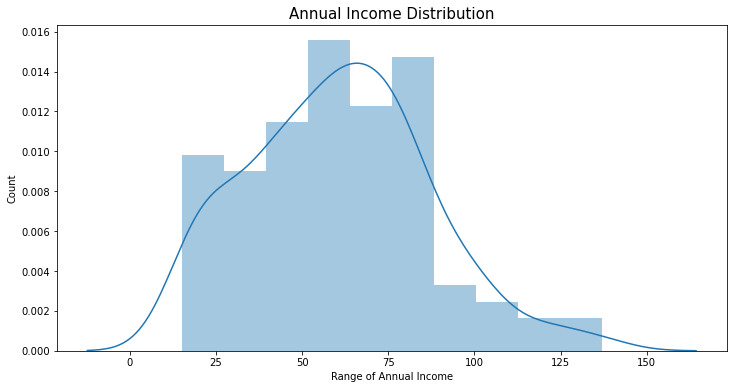

In [16]:

plt.figure(figsize=(12,6))

sns.distplot(df['annual_income'])
plt.title('Annual Income Distribution', fontsize = 15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.savefig('dist_Income.png');

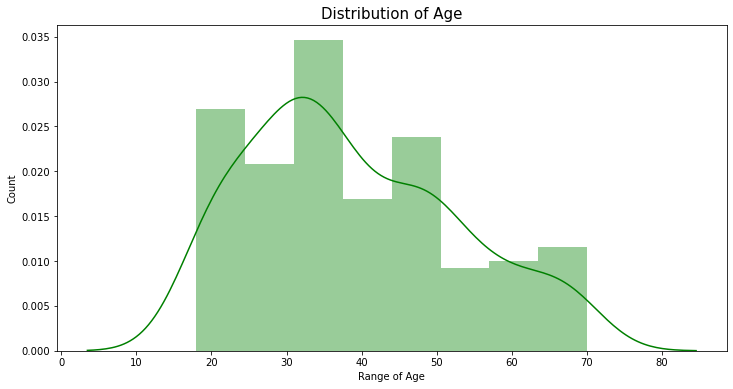

In [15]:
plt.figure(figsize=(12,6))
sns.distplot(df['age'], color = 'green')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.savefig('dist_Age.png');


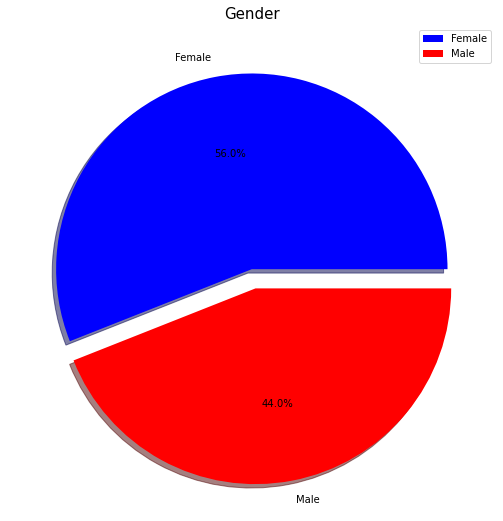

In [17]:
labels = ['Female', 'Male']
size = df['gender'].value_counts()
colors = ['blue', 'red']
explode = [0, 0.1]


plt.figure(figsize=(9,9))
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct='%.1f%%')
plt.title('Gender', fontsize = 15)
plt.axis('off')
plt.legend()
plt.savefig('dist_Gender.png')
plt.show()

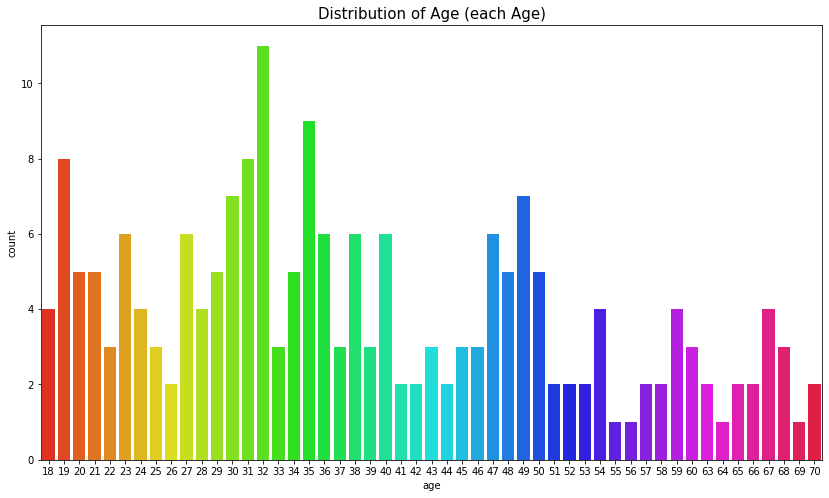

In [18]:
plt.figure(figsize=(14, 8))
sns.countplot(df['age'], palette = 'hsv')
plt.title('Distribution of Age (each Age)', fontsize = 15)
plt.show()

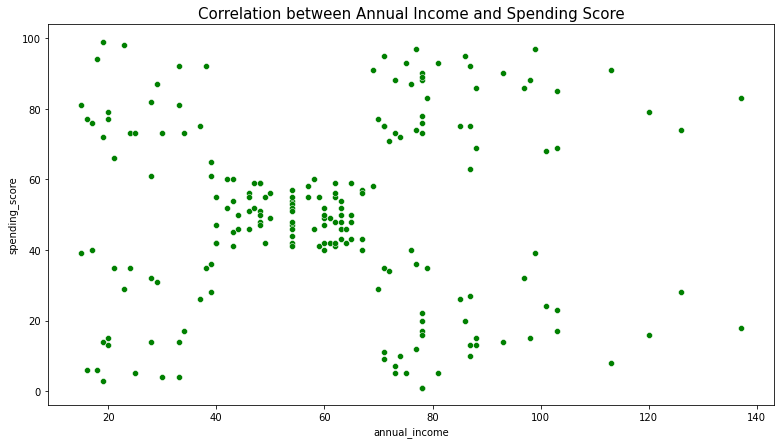

In [23]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'annual_income', y = 'spending_score', data=df, color='green')
plt.title('Correlation between Annual Income and Spending Score', fontsize = 15)
plt.show()

In [25]:
cust = df[['annual_income', 'spending_score']].values

In [50]:
X = cust

## Customer Segmentation using K-Means (Based on Spending Score & Annual Income)

In [27]:
from sklearn.cluster import KMeans

In [28]:
model_KM = KMeans(n_clusters=5, random_state=42)

In [29]:
model_KM.fit(X)

KMeans(n_clusters=5, random_state=42)

In [30]:
model_KM.predict(X)

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [31]:
model_KM.fit_predict(X) ##Alternatif

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [32]:
cluster = model_KM.predict(X)

In [33]:
df['segment'] = cluster

In [34]:
df.head()

,gender,age,annual_income,spending_score,segment
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3


In [35]:
model_KM.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [36]:
centroid = model_KM.cluster_centers_

In [37]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [38]:
X[:, 0] ##Annual Income

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

In [39]:
X[:, 1] ## Spending Score

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

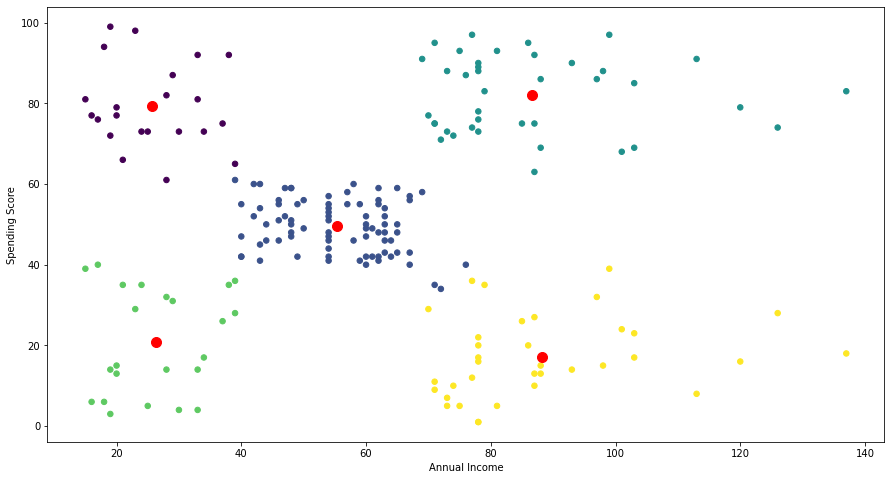

In [40]:
plt.figure(figsize=(15, 8))
plt.scatter(x = X[:, 0], y = X[:, 1], c=cluster, s=30)
plt.scatter(x = centroid[:, 0], y = centroid[:, 1], c='r', s=100)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

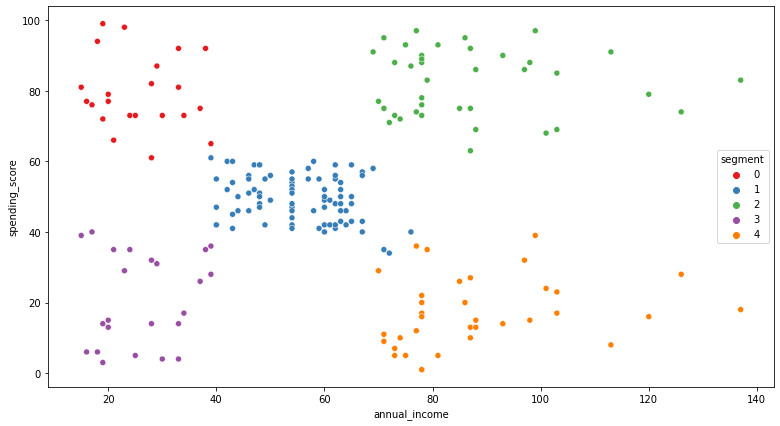

In [42]:
plt.figure(figsize=(13,7))
sns.scatterplot(x = 'annual_income', y = 'spending_score', data=df, hue = 'segment', palette='Set1')
plt.show()

### Elbow Analysis
- Use to Find the Number of Optimum Clusters

In [44]:
score = []

for i in range(2, 21):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit_predict(X)
    score.append(model.inertia_)

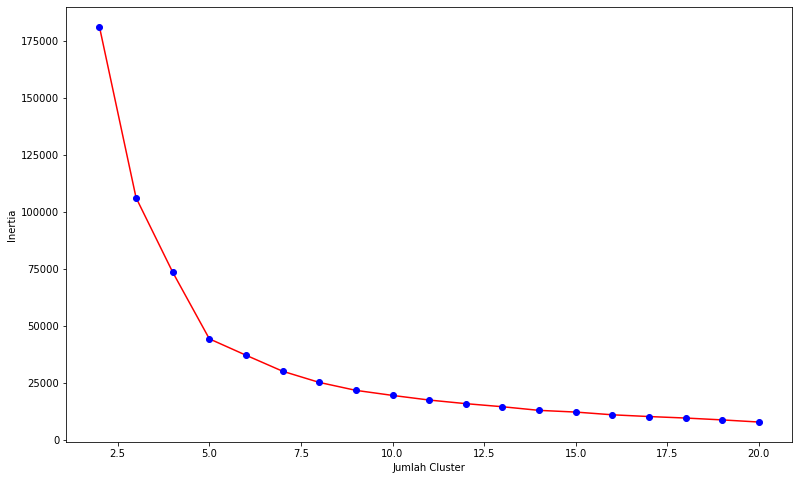

In [45]:
plt.figure(figsize=(13,8))
plt.plot(np.arange(2, 21), score, 'r-')
plt.plot(np.arange(2, 21), score, 'bo')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.show()

In [46]:
from sklearn.metrics import silhouette_score

## Silhouette Score
- Alternative method to choose No of Optimal Clusters

In [47]:
score_s = []

for i in range(2, 21):
    model_K = KMeans(n_clusters=i, random_state=42)
    cluster = model_K.fit_predict(X)
    score_s.append(silhouette_score(X, cluster))

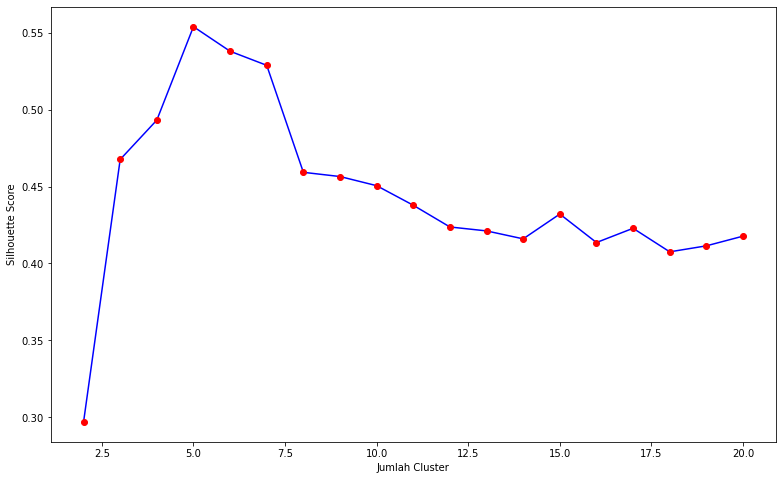

In [48]:
plt.figure(figsize=(13,8))
plt.plot(np.arange(2, 21), score_s, 'b-')
plt.plot(np.arange(2, 21), score_s, 'ro')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.show()

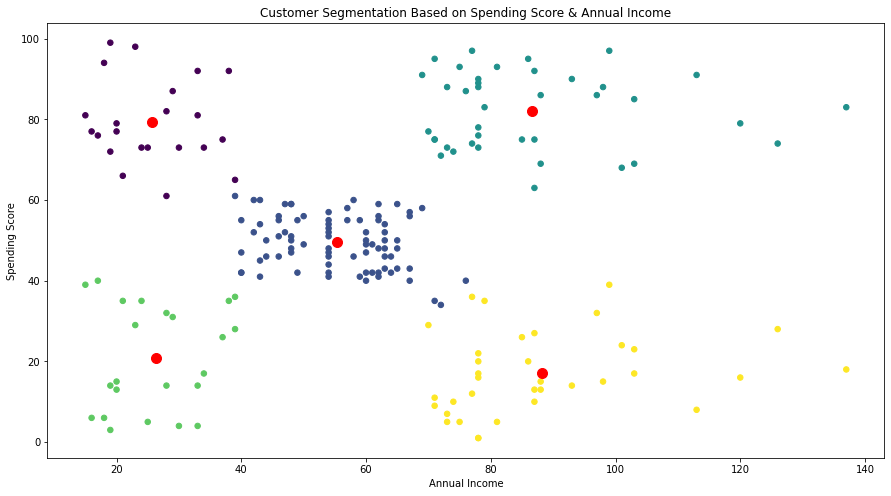

In [64]:
plt.figure(figsize=(15, 8))
plt.scatter(x = X[:, 0], y = X[:, 1], c=df['segment'], s=30)
plt.scatter(x = centroid[:, 0], y = centroid[:, 1], c='r', s=100)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title('Customer Segmentation Based on Spending Score & Annual Income')
plt.savefig('cluster_income.png')
plt.show()

## Customer Segmentation using K-Means (Based on Spending Score & Age)

In [51]:
### Define the No of Clusters using Elbow Analysis

In [52]:
x = df.iloc[:, [1, 3]].values
x.shape

(200, 2)

In [53]:
score = []

for i in range(2, 21):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit_predict(x)
    score.append(model.inertia_)

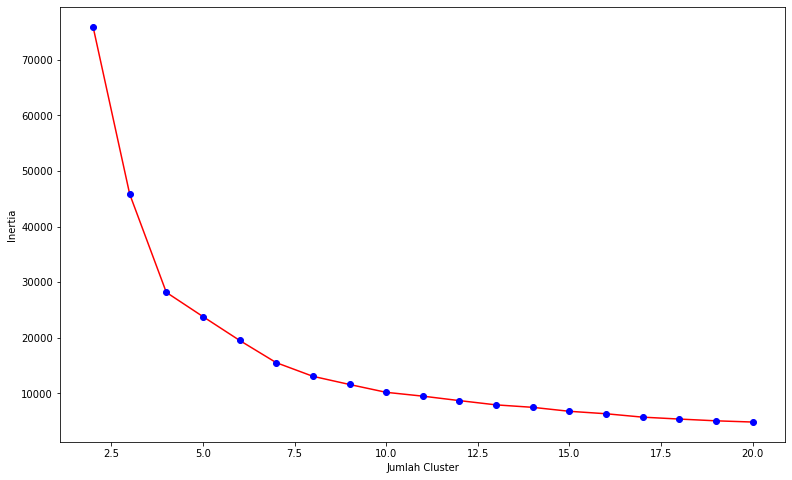

In [54]:
plt.figure(figsize=(13,8))
plt.plot(np.arange(2, 21), score, 'r-')
plt.plot(np.arange(2, 21), score, 'bo')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.show()

In [55]:
## The Optimum Number is 4 CLusters (Segmentation)

In [56]:
modelKMeans = KMeans(n_clusters=4, random_state=42)

In [57]:
modelKMeans.fit_predict(x)

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 2,
       0, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 1, 2, 1, 3, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [60]:
df['cluster'] = modelKMeans.fit_predict(x)

In [61]:
centro = modelKMeans.cluster_centers_

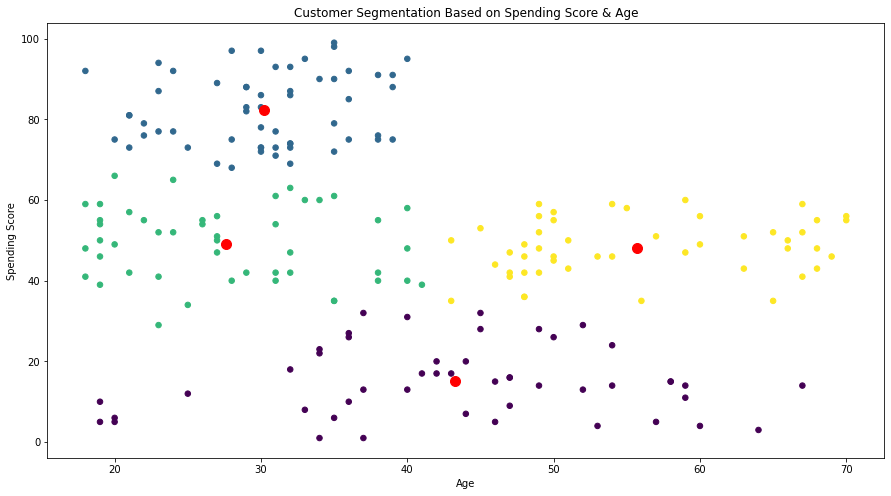

In [65]:
plt.figure(figsize=(15, 8))
plt.scatter(x = x[:, 0], y = x[:, 1], c=df['cluster'], s=30)
plt.scatter(x = centro[:, 0], y = centro[:, 1], c='r', s=100)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title('Customer Segmentation Based on Spending Score & Age')
plt.savefig('cluster_Age.png')

plt.show()